In [1]:
import json
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from datetime import datetime
from pathlib import Path


basepath = Path(r"data")
INPATH_TIKO = Path(basepath) / "grab_tiko.json"
OUTPATH = Path(basepath) / "timeseries.xlsx"


In [2]:
pd.set_option('display.max_rows', 500)
#df = df.drop('missing_data', axis =1)



In [3]:
fh = open(INPATH_TIKO) 
tiko_result = json.load(fh)
start_epoc = tiko_result['response']['start'] / 1000
start_epoc

1627768800.0

In [4]:
def make_subset_with_pretty_names(api_result: dict) -> dict:
    subset = dict()
    try:
        subset['timestamps_utc'] = api_result['response']['timestamps_utc']
    except KeyError:
        pass
    subset['missing_data'] = api_result['response']['missing_data']
    subset['PV_Produktion'] = api_result['response']['values']
    subset['Netzbezug'] = api_result['response']['values_2_ex']
    try:
        subset['Eigenverbrauch'] = api_result['response']['values_pvo_auto']
    except KeyError:
        subset['Eigenverbrauch'] = api_result['response']['auto_consumption']
    return subset

In [5]:
subset = make_subset_with_pretty_names(tiko_result)
df = pd.DataFrame.from_dict(subset)
df = df.drop('missing_data', axis =1)
df['timestamps_utc_iso'] = pd.to_datetime(df['timestamps_utc'], unit='s')
df = df.set_index('timestamps_utc_iso')

In [21]:
df['year_loc'] = (df.index + pd.DateOffset(hours=1)).strftime('%Y').astype(int)
df['month_loc'] = (df.index + pd.DateOffset(hours=1)).strftime('%m').astype(int)   # fix time zone
df['day_loc'] = (df.index + pd.DateOffset(hours=1)).strftime('%d').astype(int)   # fix time zone
df['hour_loc'] = (df.index + pd.DateOffset(hours=1)).strftime('%H').astype(int)   # fix time zone

In [22]:

df.head()

,timestamps_utc,PV_Produktion,Netzbezug,Eigenverbrauch,year_loc,month_loc,day_loc,hour_loc,time_loc
timestamps_utc_iso,,,,,,,,,
2021-07-31 23:00:00,1627772400,0.0,417.52,0.0,2021,8,1,0,00:00
2021-07-31 23:05:00,1627772700,0.0,482.08,0.0,2021,8,1,0,00:05
2021-07-31 23:10:00,1627773000,0.0,476.00,0.0,2021,8,1,0,00:10
2021-07-31 23:15:00,1627773300,0.0,334.24,0.0,2021,8,1,0,00:15
2021-07-31 23:20:00,1627773600,0.0,314.00,0.0,2021,8,1,0,00:20


In [23]:
#df=df.resample('60T').mean()
df['time_loc'] = (df.index  + pd.DateOffset(hours=1)).strftime('%H:%M')

In [24]:
df.dtypes

timestamps_utc      int64
PV_Produktion     float64
Netzbezug         float64
Eigenverbrauch    float64
year_loc            int64
month_loc           int64
day_loc             int64
hour_loc            int64
time_loc           object
dtype: object

<AxesSubplot: xlabel='timestamps_utc_iso'>

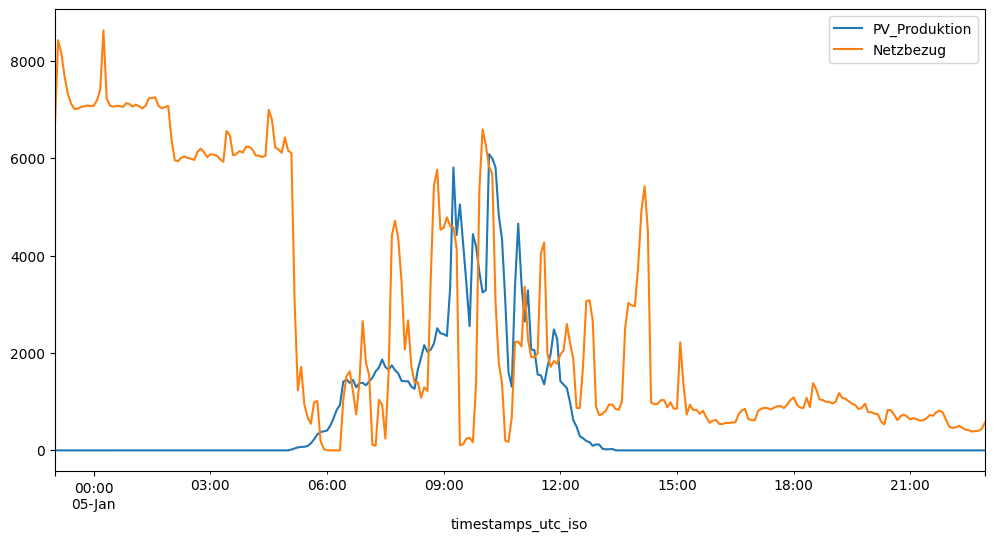

In [39]:
df1=df.query('year_loc == 2023 and month_loc == 1 and day_loc == 5')
df1=df1[['timestamps_utc', 'Netzbezug', 'PV_Produktion', 'Eigenverbrauch']]
#df1.set_index('hour_loc')
#df1.head(5)
df1[['PV_Produktion','Netzbezug',  ]].plot(figsize=(12, 6))

In [38]:
df1.head(500)

,timestamps_utc,Netzbezug,PV_Produktion,Eigenverbrauch
timestamps_utc_iso,,,,
